In [1]:
import sys
sys.path.append('/lmh_data/work/SEE/analyse/')

import matplotlib.pyplot as plt
from analyse_util import figure_size, set_plt, set_Border

In [2]:
control = '/lmh_data/data/sclab/sclab/tmp/PDGFRA/exp.log'
MSE = '/lmh_data/data/sclab/sclab/tmp/PDGFRA_old/exp.log'

In [3]:
def read_train_info(_path):
    with open(_path, 'r') as f:
        _datas = f.readlines()
    _loss, _acc = [], []
    for i in range(3, len(_datas), 2):
        _data = _datas[i].split()
        train_loss, test_loss, test_acc = float(_data[-5]), float(_data[-3]), float(_data[-1])
        _loss.append(test_loss)
        _acc.append(test_acc)
    return _loss, _acc

control_loss, control_acc = read_train_info(control)
MSE_loss, MSE_acc = read_train_info(MSE)

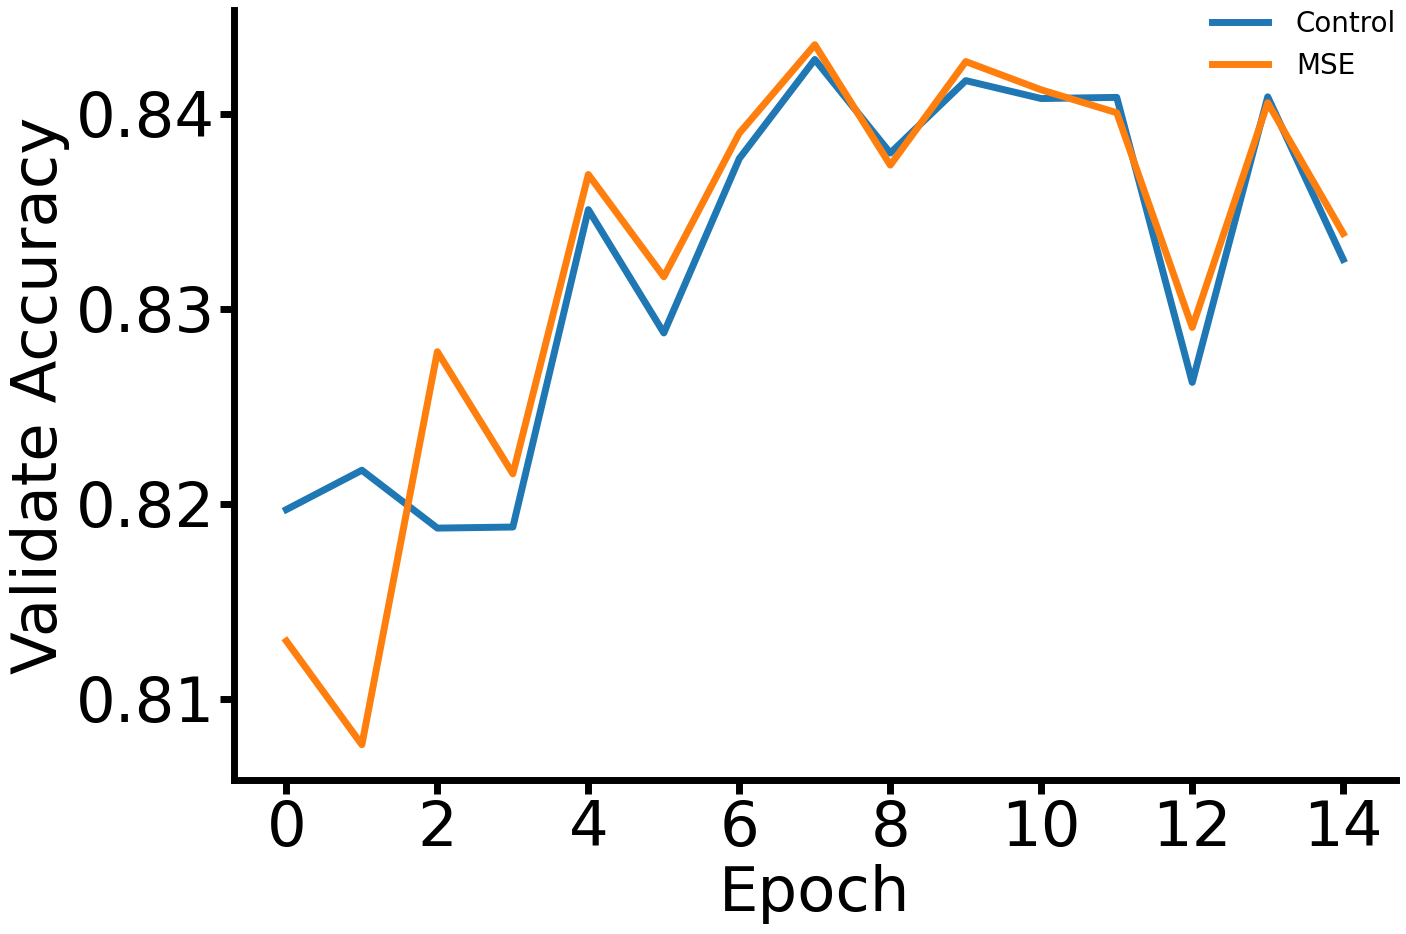

In [4]:
set_plt(figsize=(15, 10))
    
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True)
ax.grid(False)

length = 15
x = [i for i in range(length)]
ax.plot(x, control_acc[:length], label='Control')
ax.plot(x, MSE_acc[:length], label='MSE')

set_Border(plt.gca())
ax.set_xticks([i for i in range(0, 15, 2)])

plt.xlabel('Epoch')
plt.ylabel('Validate Accuracy')
plt.legend(
    facecolor='white', loc='upper right', framealpha=0, handletextpad=1, borderpad=0, borderaxespad=0
).get_frame().set_linewidth(0.0)
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/validate accuracy.pdf', format='pdf', bbox_inches='tight')
plt.show()